In [1]:
import spotipy
import spotipy.util as util
from zuzana_config import Client_ID, Client_Secret
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns
%matplotlib inline
style.use('ggplot')

In [2]:
token = spotipy.oauth2.SpotifyClientCredentials(client_id=Client_ID, client_secret=Client_Secret)
cache_token = token.get_access_token()
sp = spotipy.Spotify(cache_token)

C:\Users\zuzan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  


In [3]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name","track_id","popularity","acousticness","danceability",
                              "energy","key","loudness","mode","speechiness","instrumentalness","liveness","valence",
                              "tempo","duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["popularity"] = track["track"]["popularity"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[5:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [4]:
def analyze_playlist_dict(playlist_dict):
    
    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)
            
    return playlist_dict_df

In [5]:
playlist_dict = {"today_top_hits" : ("spotify", "37i9dQZF1DXcBWIGoYBM5M"), 
                 "billboard_100" : ("Billboard", "6UeSakyzhiEt4NB3UAd6NQ"),            
                 }

In [6]:
current_top_df = analyze_playlist_dict(playlist_dict)
current_top_df["playlist"].value_counts()

billboard_100     100
today_top_hits     50
Name: playlist, dtype: int64

In [7]:
current_top_df.count()

artist              150
album               150
track_name          150
track_id            150
popularity          150
acousticness        150
danceability        150
energy              150
key                 150
loudness            150
mode                150
speechiness         150
instrumentalness    150
liveness            150
valence             150
tempo               150
duration_ms         150
time_signature      150
playlist            150
dtype: int64

In [8]:
len(current_top_df["track_id"].unique())

129

In [9]:
duplicates_df = current_top_df[current_top_df.duplicated(["track_id"], keep="first")]
duplicates_df

,artist,album,track_name,track_id,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
50,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,100,0.24700,0.746,0.690,11,-7.956,1,0.1640,0,0.1010,0.4970,89.977,181733,4,billboard_100
51,Juice WRLD,Legends Never Die,Come & Go (with Marshmello),7y7w4tl4MaRC2UMEj1mPtr,91,0.01720,0.625,0.814,0,-5.181,1,0.0657,0,0.1580,0.5350,144.991,205485,4,billboard_100
52,Jack Harlow,"WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...","WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...",2MbdDtCv5LUVjYy9RuGTgC,91,0.06310,0.904,0.723,11,-5.224,0,0.2600,0,0.1850,0.8350,145.013,227478,4,billboard_100
54,Juice WRLD,Legends Never Die,Wishing Well,6o3QUC5oAE4g6WxRIFcZtb,92,0.00336,0.650,0.613,9,-6.130,0,0.1280,0,0.2670,0.0804,149.972,194621,4,billboard_100
55,Megan Thee Stallion,Savage Remix (feat. Beyoncé),Savage Remix (feat. Beyoncé),5v4GgrXPMghOnBBLmveLac,91,0.01600,0.822,0.743,10,-4.772,0,0.2800,0,0.1270,0.6360,84.459,242001,4,billboard_100
62,Lil Mosey,Blueberry Faygo,Blueberry Faygo,6wJYhPfqk3KGhHRG76WzOh,90,0.20700,0.774,0.554,0,-7.909,1,0.0383,0,0.1320,0.3490,99.034,162547,4,billboard_100
74,StaySolidRocky,Party Girl,Party Girl,5RqR4ZCCKJDcBLIn4sih9l,94,0.74900,0.728,0.431,6,-9.966,0,0.0622,0,0.0996,0.6290,130.022,147800,4,billboard_100
77,Lady Gaga,Rain On Me (with Ariana Grande),Rain On Me (with Ariana Grande),24ySl2hOPGCDcxBxFIqWBu,92,0.02100,0.672,0.855,9,-3.764,1,0.0397,0,0.3230,0.6460,123.056,182200,4,billboard_100
78,Chris Brown,Slime & B,Go Crazy,1IIKrJVP1C9N7iPtG6eOsK,89,0.31600,0.755,0.578,0,-8.932,0,0.1450,0,0.2500,0.5810,94.148,176960,4,billboard_100
90,Powfu,death bed (coffee for your head) (feat. beabad...,death bed (coffee for your head) (feat. beabad...,7eJMfftS33KTjuF7lTsMCx,96,0.73100,0.726,0.431,8,-8.765,0,0.1350,0,0.6960,0.3480,144.026,173333,4,billboard_100


In [170]:
duplicates_df.count()

artist              21
album               21
track_name          21
track_id            21
popularity          21
acousticness        21
danceability        21
energy              21
key                 21
loudness            21
mode                21
speechiness         21
instrumentalness    21
liveness            21
valence             21
tempo               21
duration_ms         21
time_signature      21
playlist            21
dtype: int64

In [10]:
current_top_df = current_top_df.drop(duplicates_df.index)
current_top_df

,artist,album,track_name,track_id,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,Maroon 5,Nobody's Love,Nobody's Love,3kwgqoBqTwoAH4nT29TYrq,69,0.31000,0.486,0.567,1,-6.456,1,0.0379,0,0.0949,0.1540,93.680,211254,4,today_top_hits
1,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,100,0.24700,0.746,0.690,11,-7.956,1,0.1640,0,0.1010,0.4970,89.977,181733,4,today_top_hits
2,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,95,0.12200,0.548,0.816,0,-4.209,1,0.0465,0,0.3350,0.5570,95.390,174000,4,today_top_hits
3,Taylor Swift,folklore,cardigan,4R2kfaDFhslZEMJqAFNpdd,80,0.53700,0.613,0.581,0,-8.588,0,0.0424,0.000345,0.2500,0.5510,130.033,239560,4,today_top_hits
4,Juice WRLD,Legends Never Die,Wishing Well,6o3QUC5oAE4g6WxRIFcZtb,92,0.00336,0.650,0.613,9,-6.130,0,0.1280,0,0.2670,0.0804,149.972,194621,4,today_top_hits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Kenny Chesney,Knowing You,Here And Now,02LPxsehaIst1MW8wLtiyt,22,0.04840,0.509,0.814,9,-3.576,1,0.0532,0,0.1200,0.7120,148.034,171493,4,billboard_100
146,Lil Durk,3 Headed Goat (feat. Lil Baby & Polo G),3 Headed Goat (feat. Lil Baby & Polo G),677KTHp39ZBJ9csDdgymI9,76,0.26200,0.835,0.482,8,-8.607,0,0.3670,0,0.0991,0.4480,143.015,169532,4,billboard_100
147,HIXTAPE,HIXTAPE: Vol. 1,"One Beer (HARDY feat. Lauren Alaina, Devin Daw...",5FmvaZGd6fulojSToozLRD,77,0.56300,0.516,0.745,2,-8.352,1,0.0774,0,0.2750,0.8250,186.004,173173,3,billboard_100
148,Pop Smoke,Shoot For The Stars Aim For The Moon,44 BullDog,7sjFIZ1g5QLJLGja3k592K,81,0.02870,0.800,0.564,8,-5.817,1,0.4000,1.65e-06,0.1120,0.3180,139.989,150857,4,billboard_100


In [11]:
current_top_df.describe()

,acousticness,danceability,energy,loudness,speechiness,liveness,valence,tempo
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.212847,0.686938,0.640829,-6.228566,0.108157,0.187927,0.500440,119.436264
std,0.208724,0.129846,0.132135,1.907486,0.098192,0.142207,0.219969,29.030940
min,0.001460,0.288000,0.252000,-17.540000,0.026600,0.037700,0.039600,62.948000
25%,0.031300,0.599000,0.546000,-7.258000,0.041800,0.098800,0.324000,95.987000
50%,0.168000,0.676000,0.633000,-6.130000,0.062900,0.124000,0.500000,118.961000
75%,0.308000,0.789000,0.735000,-5.022000,0.135000,0.258000,0.646000,142.037000
max,0.866000,0.961000,0.949000,-2.850000,0.481000,0.790000,0.939000,186.004000


In [12]:
playlist_id = ["37i9dQZF1DX4fpCWaHOned", "3ssqtyMsmRFCcOoAzvphwu", "4BlcsJJS5AjcKPRRgeWZz8"]
playlist_name = ["confidence_boost", "slow_down_and_breath", "sunday_morning_paris_cafe"]
username = []
for playlist in playlist_id:
    username.append(sp.playlist(playlist)["owner"]["id"])
username
my_playlist_dict = {playlist_name[i]: (username[i], playlist_id[i]) for i in range(len(playlist_name))}

In [13]:
zuzana_playlist_df = analyze_playlist_dict(my_playlist_dict)
zuzana_playlist_df["playlist"].value_counts()

sunday_morning_paris_cafe    100
confidence_boost              70
slow_down_and_breath          14
Name: playlist, dtype: int64

In [14]:
zuzana_playlist_df.head(3)

,artist,album,track_name,track_id,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,Anne-Marie,To Be Young (feat. Doja Cat),To Be Young (feat. Doja Cat),4YAg8h8WliHZlW5wuv8Jpk,73,0.317,0.512,0.595,8,-5.131,1,0.0868,0.000013,0.113,0.253,156.044,204447,4,confidence_boost
1,R3HAB,Good Example (with Andy Grammer),Good Example (with Andy Grammer),5SspaMrPfWyRCS0GpjIxa6,72,0.427,0.456,0.496,1,-6.986,1,0.0743,0.000000,0.134,0.450,90.552,149053,4,confidence_boost
2,Bebe Rexha,"You Can't Stop The Girl (From Disney's ""Malefi...","You Can't Stop The Girl (From Disney's ""Malefi...",1i3z3GR1JtLswOSJNO0BQw,73,0.706,0.394,0.718,7,-6.336,1,0.0607,0.000000,0.116,0.247,151.912,158258,4,confidence_boost


In [15]:
zuzana_playlist_df.dtypes

artist               object
album                object
track_name           object
track_id             object
popularity           object
acousticness        float64
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms          object
time_signature       object
playlist             object
dtype: object

In [16]:
zuzana_playlist_df["popularity"] = zuzana_playlist_df.popularity.astype(float)
#zuzana_playlist_df["duration_ms"] = zuzana_playlist_df.duration_ms.astype(float)
zuzana_playlist_df.dtypes

artist               object
album                object
track_name           object
track_id             object
popularity          float64
acousticness        float64
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms          object
time_signature       object
playlist             object
dtype: object

In [17]:
# Normalising the loudness to scale 0 to 1 
#resource: https://towardsdatascience.com/predicting-my-mood-using-my-spotify-data-2e898add122a
from sklearn import preprocessing
loudness = zuzana_playlist_df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
zuzana_playlist_df['loudness'] = min_max_scaler.fit_transform(loudness)

In [175]:
zuzana_playlist_df
zuzana_playlist_df.groupby('playlist').corr()

popularity  acousticness  \
playlist                                                               
confidence_boost          popularity          1.000000      0.038173   
                          acousticness        0.038173      1.000000   
                          danceability        0.212922     -0.151881   
                          energy             -0.200995     -0.363526   
                          loudness           -0.101310     -0.243409   
                          speechiness        -0.042758     -0.060413   
                          instrumentalness   -0.147915     -0.106111   
                          liveness           -0.022185     -0.030820   
                          valence            -0.023758     -0.222293   
                          tempo              -0.370218     -0.045094   
slow_down_and_breath      popularity          1.000000      0.158709   
                          acousticness        0.158709      1.000000   
                          danceability        0.342294     -0.619502   
                          energy              0.389245     -0.575216   
                          loudness            0.260062     -0.473267   
                          speechiness        -0.240196      0.337052   
                          instrumentalness    0.235366      0.437235   
                          liveness            0.282529      0.233171   
                          valence             0.456900     -0.264860   
                          tempo               0.010974      0.053339   
sunday_morning_paris_cafe popularity          1.000000     -0.067406   
                          acousticness       -0.067406      1.000000   
                          danceability        0.061801     -0.207716   
                          energy             -0.046051     -0.466786   
                          loudness           -0.138657     -0.337872   
                          speechiness        -0.037380      0.037687   
                          instrumentalness    0.168123      0.045803   
                          liveness            0.042015     -0.116858   
                          valence            -0.035788     -0.120555   
                          tempo               0.052320     -0.086804   

                                            danceability    energy  loudness  \
playlist                                                                       
confidence_boost          popularity            0.212922 -0.200995 -0.101310   
                          acousticness         -0.151881 -0.363526 -0.243409   
                          danceability          1.000000  0.170063  0.106293   
                          energy                0.170063  1.000000  0.679768   
                          loudness              0.106293  0.679768  1.000000   
                          speechiness           0.053209  0.090701  0.013035   
                          instrumentalness      0.114219  0.217870  0.165801   
                          liveness             -0.041427  0.306492  0.299763   
                          valence               0.498279  0.387147  0.228455   
                          tempo                -0.319607  0.236605  0.168460   
slow_down_and_breath      popularity            0.342294  0.389245  0.260062   
                          acousticness         -0.619502 -0.575216 -0.473267   
                          danceability          1.000000  0.851965  0.731193   
                          energy                0.851965  1.000000  0.883579   
                          loudness              0.731193  0.883579  1.000000   
                          speechiness          -0.344795 -0.190616 -0.032778   
                          instrumentalness     -0.226994 -0.344245 -0.429247   
                          liveness             -0.244189 -0.123192  0.093110   
                          valence               0.833520  0.781422  0.622428   
                          tempo                 0.112579  0

In [19]:
# create table and transpose 
compare_playlists = zuzana_playlist_df.groupby("playlist").mean().T
compare_playlists

playlist,confidence_boost,slow_down_and_breath,sunday_morning_paris_cafe
popularity,72.614286,23.071429,22.400000
acousticness,0.148654,0.848400,0.741797
danceability,0.661071,0.310400,0.623480
energy,0.706957,0.155116,0.324724
loudness,0.881218,0.336247,0.609479
speechiness,0.103051,0.042221,0.045753
instrumentalness,0.000781,0.611132,0.072454
liveness,0.184004,0.155193,0.144732
valence,0.495240,0.156779,0.477532
tempo,120.773714,108.406714,115.299590


In [20]:
features_df = compare_playlists.drop(['popularity', 'tempo','speechiness'])
features_df

playlist,confidence_boost,slow_down_and_breath,sunday_morning_paris_cafe
acousticness,0.148654,0.848400,0.741797
danceability,0.661071,0.310400,0.623480
energy,0.706957,0.155116,0.324724
loudness,0.881218,0.336247,0.609479
instrumentalness,0.000781,0.611132,0.072454
liveness,0.184004,0.155193,0.144732
valence,0.495240,0.156779,0.477532


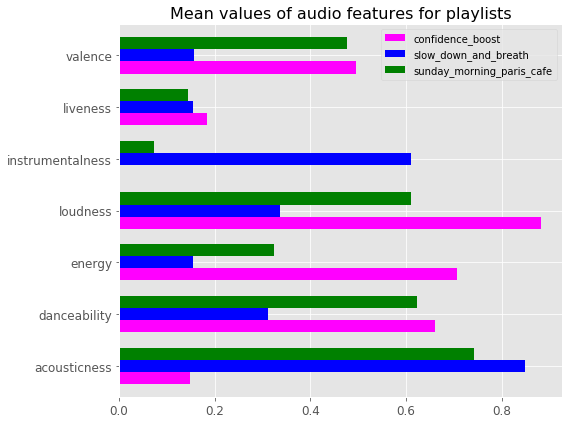

In [160]:
#plt.figure(figsize=(20,3))
#lt.bar(x_axis, comparison_playlist["confidence_boost"], color='r', alpha=0.5, align ="center")
#plt.xticks(tick_locations, index, rotation="vertical")

features_df.plot(kind="barh", figsize=(8,6), color = ['magenta','blue', 'green'], grid=True, width=0.7, fontsize=12)
plt.title('Mean values of audio features for playlists', fontsize = 16)
plt.legend(fontsize = 10)
plt.tight_layout()
plt.show()

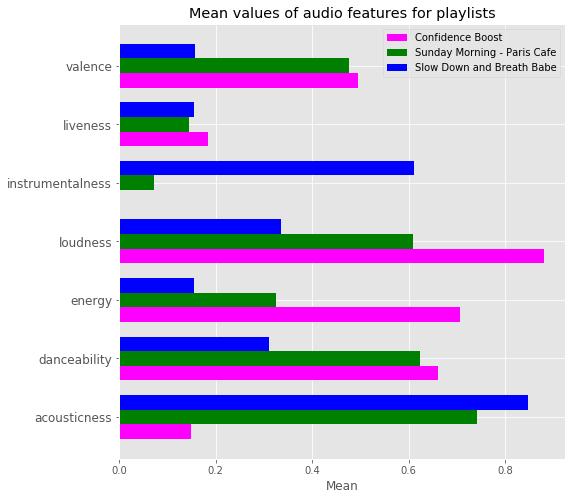

In [105]:
y_axis = np.arange(len(features_df))

width = 0.25
#Bar plot for each list
plt.barh(y_axis, features_df['confidence_boost'], width, label = 'Confidence Boost', color = 'magenta')
plt.barh(y_axis + width, features_df['sunday_morning_paris_cafe'], width, label = 'Sunday Morning - Paris Cafe', color ='green')
plt.barh(y_axis + width + width, features_df.slow_down_and_breath, width, label = 'Slow Down and Breath Babe', color = 'blue')

# X-label
plt.xlabel('Mean', fontsize = 12)

#y-label & vertical ticks
plt.yticks(y_axis+width, (list(features_df.index)), fontsize = 12)

# Title
plt.title ('Mean values of audio features for playlists')

# legend
plt.legend(loc = 'best')

#figure size
plt.rcParams['figure.figsize'] = (8,8)
#style.use('ggplot')
plt.show()

In [25]:
style.use?
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

Signature: style.use(style)
Docstring:
Use matplotlib style settings from a style specification.

The style name of 'default' is reserved for reverting back to
the default style settings.

Parameters
----------
style : str, dict, or list
    A style specification. Valid options are:

    +------+-------------------------------------------------------------+
    | str  | The name of a style or a path/URL to a style file. For a    |
    |      | list of available style names, see `style.available`.       |
    +------+-------------------------------------------------------------+
    | dict | Dictionary with valid key/value pairs for                   |
    |      | `matplotlib.rcParams`.                                      |
    +------+-------------------------------------------------------------+
    | list | A list of style specifiers (str or dict) applied from first |
    |      | to last in the list.                                        |
    +------+----------------------------

In [26]:
plt.legend?

Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to three different ways how to use
this method.

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    line, = ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `Axes.legend` without
any arguments and without setting the labels manually will 

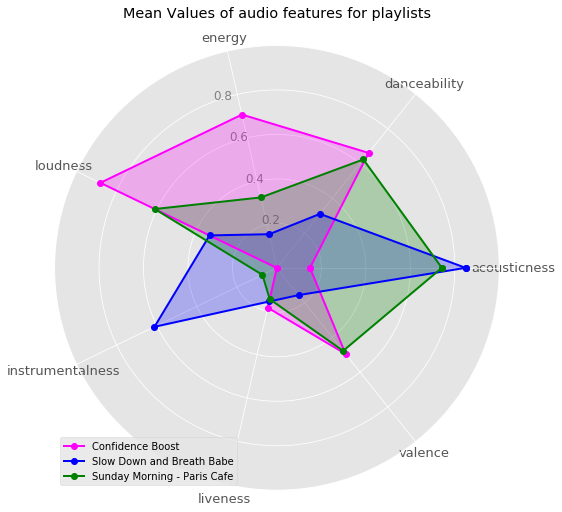

In [106]:
labels = list(features_df.index)
stats1 = features_df['confidence_boost']
stats2 = list(features_df['slow_down_and_breath'])
stats3 = list(features_df['sunday_morning_paris_cafe'])

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

#close the plot
stats1 = np.concatenate((stats1, [stats1[0]]))
stats2 = np.concatenate((stats2, [stats2[0]]))
stats3 = np.concatenate((stats3, [stats3[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Size of the figure
fig = plt.figure(figsize =(18,18))

ax = fig.add_subplot(221, polar = True)
ax.plot(angles, stats1, 'o-', linewidth = 2, label = "Confidence Boost", color ='magenta')
ax.fill(angles, stats1, alpha = 0.25, facecolor = 'magenta')
ax.set_thetagrids(angles *180/np.pi, labels, fontsize = 13)

ax.set_rlabel_position(111)
plt.yticks([0.2, 0.4, 0.6, 0.8 ], ["0.2", "0.4", "0.6", "0.8"], color ="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth = 2, label = "Slow Down and Breath Babe", color ='blue')
ax.fill(angles, stats2, alpha = 0.25, facecolor = 'blue')

ax.plot(angles, stats3, 'o-', linewidth = 2, label = "Sunday Morning - Paris Cafe", color ='green')
ax.fill(angles, stats3, alpha = 0.25, facecolor = 'green')

ax.set_title('Mean Values of audio features for playlists')
ax.grid(True)

plt.legend(loc='lower left')

plt.show()

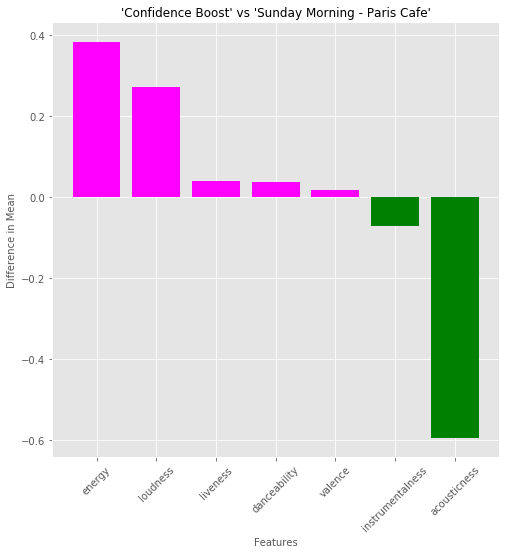

In [97]:
# Create a bar plot for comparison of differences between 'Confidence Boost' and 'Sunday Morning - Paris Cafe' playlist
# Calculate the differences and sort values in descending order
diff1 = features_df.confidence_boost - features_df.sunday_morning_paris_cafe
diff1 = diff1.sort_values(ascending=False)

# The colors for each bar needs to be assigned manually based on which playlist's value is higher:
colors = []
for i in diff1:
    if i > 0:
        colors.append('magenta')
    else:
        colors.append('green')

#Create a bar plot with assigning the colors as defined in the step above
x = np.arange(len(diff1))
y = diff1
plt.bar(x,y, color = colors)
plt.xticks(x, diff1.index, rotation=45)
plt.ylabel('Difference in Mean', fontsize = 10)
plt.xlabel('Features', fontsize = 10)
plt.title("'Confidence Boost' vs 'Sunday Morning - Paris Cafe'", fontsize = 12)
plt.show()

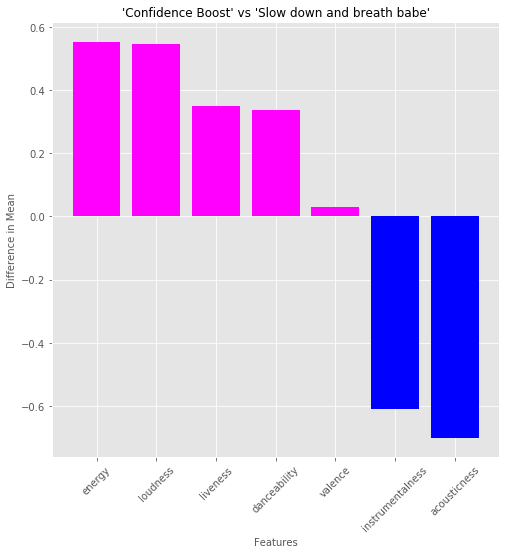

In [98]:
# Create a bar plot for comparison of differences between 'Confidence Boost' and 'Slow down and breath babe'
# Calculate the differences and sort values in descending order
diff2 = features_df.confidence_boost - features_df.slow_down_and_breath
diff2 = diff2.sort_values(ascending=False)

# The colors for each bar needs to be assigned manually based on which playlist's value is higher:
colors = []
for i in diff2:
    if i > 0:
        colors.append('magenta')
    else:
        colors.append('blue')

#Create a bar plot with assigning the colors as defined in the step above
x = np.arange(len(diff2))
y = diff2
plt.bar(x,y, color = colors)
plt.xticks(x, diff_boost_paris.index, rotation=45)
plt.ylabel('Difference in Mean', fontsize = 10)
plt.xlabel('Features', fontsize = 10)
plt.title("'Confidence Boost' vs 'Slow down and breath babe'", fontsize = 12)
plt.show()

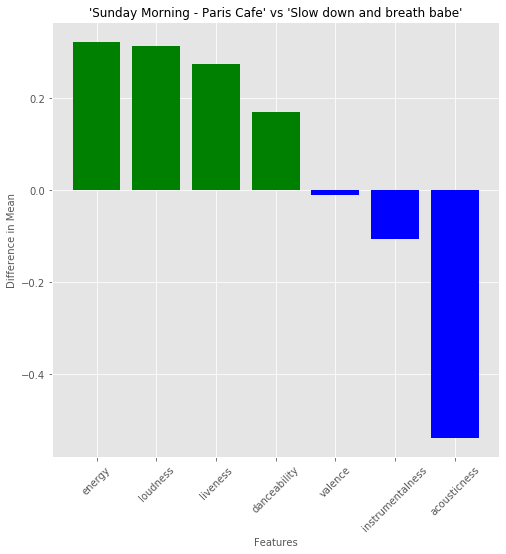

In [99]:
# Create a bar plot for comparison of differences between 'Sunday Morning - Paris Cafe' and 'Slow down and breath babe'
# Calculate the differences and sort values in descending order
diff3 = features_df.sunday_morning_paris_cafe - features_df.slow_down_and_breath
diff3 = diff3.sort_values(ascending=False)

# The colors for each bar needs to be assigned manually based on which playlist's value is higher:
colors = []
for i in diff3:
    if i > 0:
        colors.append('green')
    else:
        colors.append('blue')

#Create a bar plot with assigning the colors as defined in the step above
x = np.arange(len(diff3))
y = diff3
plt.bar(x,y, color = colors)
plt.xticks(x, diff_boost_paris.index, rotation=45)
plt.ylabel('Difference in Mean', fontsize = 10)
plt.xlabel('Features', fontsize = 10)
plt.title("'Sunday Morning - Paris Cafe' vs 'Slow down and breath babe'", fontsize = 12)
plt.show()

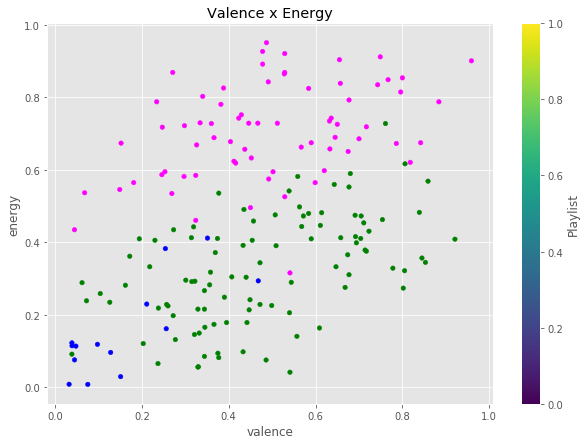

In [169]:
# Correlation Between Variables:  Valence x Energy

# assign to playlist df a column that will be used to assign the different color in the scatter plot
color = []
for i in zuzana_playlist_df['playlist']:
    if i == "confidence_boost":
        color.append('magenta')
    if i == "sunday_morning_paris_cafe":
        color.append('green')
    if i == "slow_down_and_breath":
        color.append('blue')
zuzana_playlist_df['Playlist'] = color

# Create scatter plot for Valence vs Energy 
fig, ax = plt.subplots()
zuzana_playlist_df.plot(kind = 'scatter', x= 'valence', y= 'energy', c = 'Playlist', ax=ax, title ="Valence x Energy", 
                        figsize=(10,7))
plt.show()

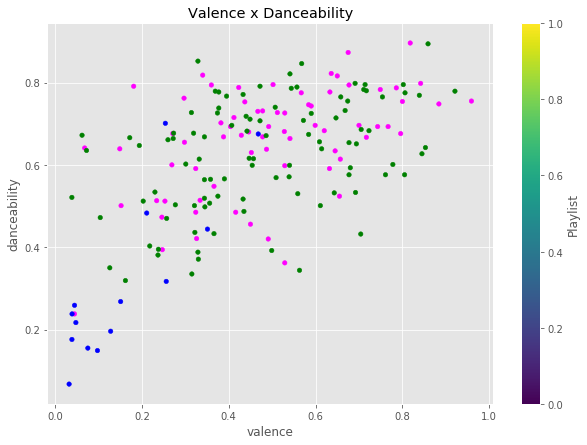

In [165]:
# Create scatter plot for Valence vs Dancebility
fig, ax = plt.subplots()
zuzana_playlist_df.plot(kind = 'scatter', x= 'valence', y= 'danceability', c = 'Playlist', ax=ax, 
                        title ="Valence x Danceability", figsize=(10,7))
plt.show()

In [284]:
#Diversity of the lists - calculate the mean of standard deviations to be able to compare
mean_std=((zuzana_playlist_df.groupby('playlist')).std().T).drop(['popularity', 'tempo']).mean()
mean_std

playlist
confidence_boost             0.120834
slow_down_and_breath         0.184900
sunday_morning_paris_cafe    0.146820
dtype: float64

In [285]:
import scipy.stats as stats
confidence_danceability = zuzana_playlist_df.danceability[zuzana_playlist_df['playlist'] == "confidence_boost"]
sunday_danceability = zuzana_playlist_df.danceability[zuzana_playlist_df['playlist'] == "sunday_morning_paris_cafe"]
danceability_ttest = stats.ttest_ind(confidence_danceability, sunday_danceability, equal_var=False)
danceability_ttest

confidence_valence = zuzana_playlist_df.valence[zuzana_playlist_df['playlist'] == "confidence_boost"]
sunday_valence = zuzana_playlist_df.valence[zuzana_playlist_df['playlist'] == "sunday_morning_paris_cafe"]
valence_ttest = stats.ttest_ind(confidence_valence, sunday_valence, equal_var=False)
valence_ttest

print(f"Results of Independent T-Tests for comparison of 'Confidence Boost' and 'Sunday Morning - Paris Cafe' playlist")
print(f"for danceability:")
print(danceability_ttest)
print("------")
print(f"for valence:")
print(valence_ttest)   


Results of Independent T-Tests for comparison of 'Confidence Boost' and 'Sunday Morning - Paris Cafe' playlist
for danceability:
Ttest_indResult(statistic=1.8222235327277319, pvalue=0.07037992893382619)
------
for valence:
Ttest_indResult(statistic=0.5565110396042272, pvalue=0.578685545833565)


In [286]:
def gendata(loc1=0, loc2=0):

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

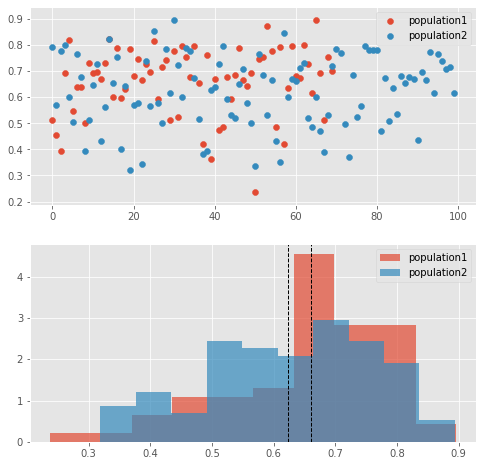

In [287]:
population1=confidence_danceability
population2=sunday_danceability
population1, population2 = gendata()

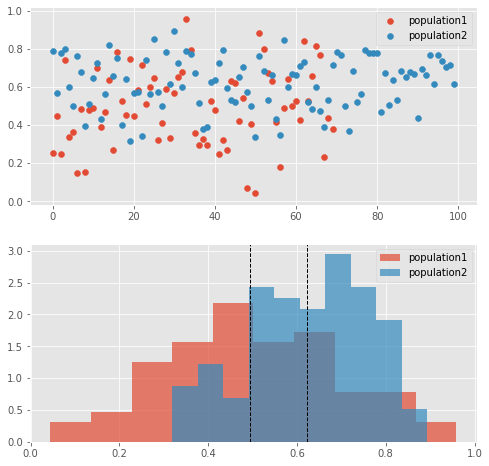

In [288]:
population1=confidence_valence
population2=sunday_valence =gendata()